In [1]:
import pandas as pd

# Load the dataset
file_path = "asag_dataset.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           646 non-null    int64  
 1   question             646 non-null    object 
 2   student_answer       607 non-null    object 
 3   grades_round         646 non-null    int64  
 4   student_modified     606 non-null    object 
 5   ref_answer           646 non-null    object 
 6   qn_modified          646 non-null    object 
 7   ref_modified         646 non-null    object 
 8   student_demoted      606 non-null    object 
 9   ref_demoted          646 non-null    object 
 10  length_ratio         646 non-null    float64
 11  embed_ref            646 non-null    object 
 12  embed_stud           646 non-null    object 
 13  embed_ref_demoted    646 non-null    object 
 14  embed_stud_demoted   646 non-null    object 
 15  aligned              646 non-null    obj

In [2]:
# df.head()
print(df.describe())
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)



       Unnamed: 0  grades_round  length_ratio  cos_similarity  \
count  646.000000    646.000000    646.000000      646.000000   
mean   322.500000      1.369969      0.252263        0.733258   
std    186.628419      0.724518      0.148225        0.212926   
min      0.000000      0.000000      0.000000        0.000000   
25%    161.250000      1.000000      0.161837        0.709271   
50%    322.500000      2.000000      0.233747        0.790438   
75%    483.750000      2.000000      0.327405        0.849242   
max    645.000000      2.000000      1.000000        1.000000   

       cos_similarity_demo  aligned_score  aligned_score_demo  question_id  
count           646.000000     646.000000          646.000000   646.000000  
mean              0.693964       0.364100            0.319602     9.000000  
std               0.210168       0.180216            0.175425     4.902776  
min               0.000000       0.000000            0.000000     1.000000  
25%               0.655392   

In [ ]:
# # Print rows with missing values for each column
# for column in missing_values[missing_values > 0].index:
#     print(f"Rows with missing values in column '{column}':")
#     print(df[df[column].isnull()])
#     print("\n")

In [3]:
# Check for rows where 'student_modified' or 'student_demoted' are missing but 'student_answer' is not
discrepancy_rows = df[df['student_answer'].notnull() & (df['student_modified'].isnull() | df['student_demoted'].isnull())]
print("Rows where 'student_answer' is present but 'student_modified' or 'student_demoted' are missing:")
print(discrepancy_rows)

Rows where 'student_answer' is present but 'student_modified' or 'student_demoted' are missing:
     Unnamed: 0                                           question  \
555         555  What are three items to be learned for an RBF ...   

    student_answer  grades_round student_modified  \
555              -             0              NaN   

                                            ref_answer  \
555  Three items to be learned are centers, weights...   

                                           qn_modified  \
555  three item learned rbf network difference nns ...   

                                          ref_modified student_demoted  \
555  three item learned center weight bias rbfn con...             NaN   

                                           ref_demoted  ...  embed_stud  \
555  center weight bias rbfn consists single hidden...  ...         0.0   

                                     embed_ref_demoted embed_stud_demoted  \
555  [[ 0.61642578 -0.19705078  0.61673096  1

#### Improved Tf-Idf method

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lanaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lanaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lanaa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Extracting features...

Feature Correlations with Grade:
grade                  1.000000
keyword_match_ratio    0.540656
bow_similarity         0.480673
jaccard_similarity     0.442741
tfidf_similarity       0.435677
char_length_ratio      0.428593
word_count_ratio       0.420252
word_count_diff       -0.153706
char_length_diff      -0.172213
Name: grade, dtype: float64

Training and evaluating models...
Linear Regression:
  MAE: 0.458
  RMSE: 0.544
  R²: 0.345
  Accuracy: 66.89%

Ridge Regression:
  MAE: 0.460
  RMSE: 0.546
  R²: 0.342
  Accuracy: 66.77%

Lasso Regression:
  MAE: 0.606
  RMSE: 0.673
  R²: -0.001
  Accuracy: 56.26%

ElasticNet:
  MAE: 0.606
  RMSE: 0.673
  R²: -0.001
  Accuracy: 56.26%

SVR:
  MAE: 0.409
  RMSE: 0.528
  R²: 0.384
  Accuracy: 70.46%

Random Forest:
  MAE: 0.433
  RMSE: 0.523
  R²: 0.395
  Accuracy: 68.73%

Gradient Boosting:
  MAE: 0.438
  RMSE: 0.537
  R²: 0.362
  Accuracy: 68.36%

Best Model: SVR with MAE: 0.409

Feature Importance (Random Forest):
ke

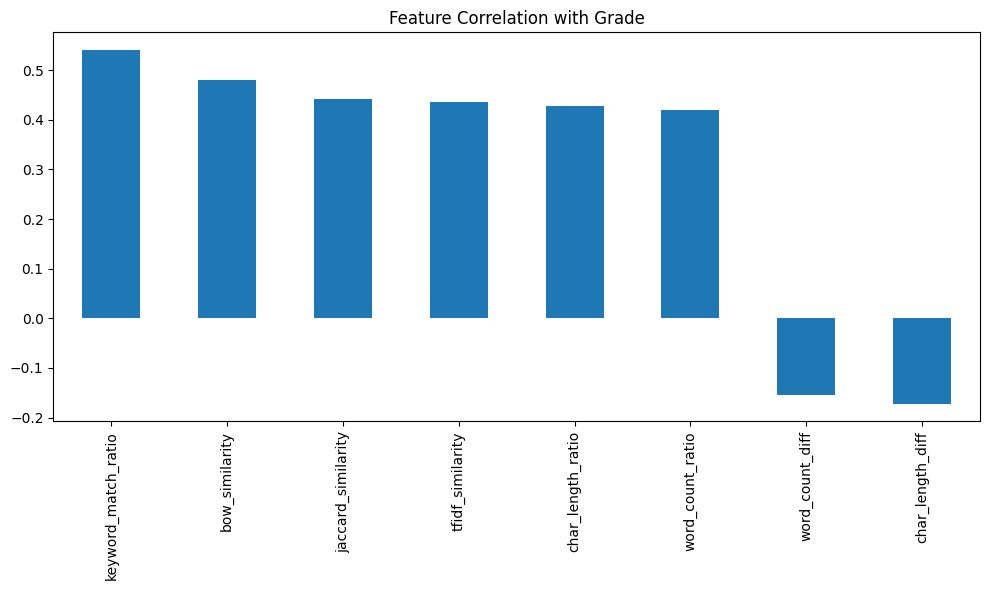

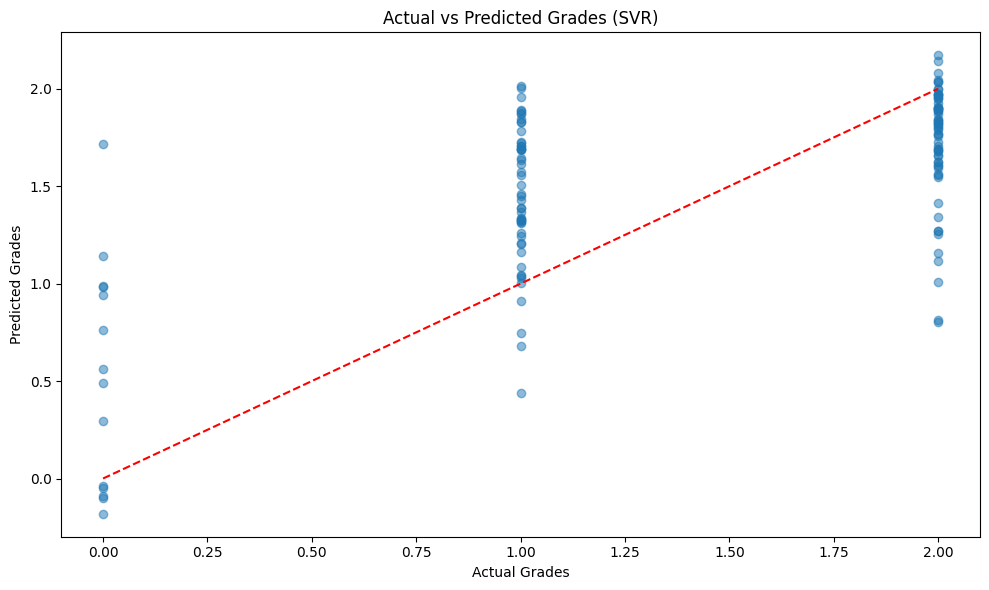

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download necessary NLTK packages
try:
    nltk.data.find('corpora/stopwords')
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('wordnet')

def preprocess_text(text):
    """Advanced text preprocessing function"""
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Define a function to extract text features
def extract_text_features(ref_answers, stud_answers):
    """Extract multiple features from text answers"""
    
    # Text preprocessing
    ref_processed = [preprocess_text(str(text)) for text in ref_answers]
    stud_processed = [preprocess_text(str(text)) for text in stud_answers]
    
    # TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=614)
    ref_tfidf = tfidf_vectorizer.fit_transform(ref_processed)
    stud_tfidf = tfidf_vectorizer.transform(stud_processed)
    
    # Basic Bag of Words
    count_vectorizer = CountVectorizer(min_df=1, max_df=614)
    ref_bow = count_vectorizer.fit_transform(ref_processed)
    stud_bow = count_vectorizer.transform(stud_processed)
    
    # Cosine similarity using TF-IDF
    tfidf_sim = cosine_similarity(ref_tfidf, stud_tfidf).diagonal().reshape(-1, 1)
    
    # Cosine similarity using BoW
    bow_sim = cosine_similarity(ref_bow, stud_bow).diagonal().reshape(-1, 1)
    
    # Text length features
    ref_char_lengths = np.array([len(str(text)) for text in ref_answers]).reshape(-1, 1)
    stud_char_lengths = np.array([len(str(text)) for text in stud_answers]).reshape(-1, 1)
    char_length_ratio = np.array([min(len(str(s)), len(str(r))) / max(len(str(s)), len(str(r))) if max(len(str(s)), len(str(r))) > 0 else 0 
                                 for s, r in zip(stud_answers, ref_answers)]).reshape(-1, 1)
    char_length_diff = np.abs(ref_char_lengths - stud_char_lengths)
    
    # Word count features
    ref_word_counts = np.array([len(str(text).split()) for text in ref_answers]).reshape(-1, 1)
    stud_word_counts = np.array([len(str(text).split()) for text in stud_answers]).reshape(-1, 1)
    word_count_ratio = np.array([min(len(str(s).split()), len(str(r).split())) / max(len(str(s).split()), len(str(r).split())) 
                                if max(len(str(s).split()), len(str(r).split())) > 0 else 0
                                for s, r in zip(stud_answers, ref_answers)]).reshape(-1, 1)
    word_count_diff = np.abs(ref_word_counts - stud_word_counts)
    
    # Unique words overlap
    def unique_word_overlap(text1, text2):
        set1 = set(preprocess_text(str(text1)).split())
        set2 = set(preprocess_text(str(text2)).split())
        if not set1 or not set2:
            return 0
        overlap = len(set1.intersection(set2))
        union = len(set1.union(set2))
        return overlap / union if union > 0 else 0
    
    jaccard_sim = np.array([unique_word_overlap(s, r) for s, r in zip(stud_answers, ref_answers)]).reshape(-1, 1)
    
    # Keyword matching
    def keyword_match_ratio(text1, text2):
        # Count how many words in text1 appear in text2
        words1 = Counter(preprocess_text(str(text1)).split())
        words2 = set(preprocess_text(str(text2)).split())
        if not words1:
            return 0
        matches = sum(1 for word in words1 if word in words2)
        return matches / len(words1) if len(words1) > 0 else 0
    
    keyword_match = np.array([keyword_match_ratio(r, s) for r, s in zip(ref_answers, stud_answers)]).reshape(-1, 1)
    
    # Combine all features
    features = np.hstack([
        tfidf_sim,
        bow_sim,
        char_length_ratio,
        char_length_diff,
        word_count_ratio,
        word_count_diff,
        jaccard_sim,
        keyword_match
    ])
    
    # Create feature names for analysis
    feature_names = [
        'tfidf_similarity',
        'bow_similarity',
        'char_length_ratio',
        'char_length_diff',
        'word_count_ratio', 
        'word_count_diff',
        'jaccard_similarity',
        'keyword_match_ratio'
    ]
    
    return features, feature_names

def create_and_evaluate_models(X, y, feature_names):
    """Create, train and evaluate multiple models"""
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create multiple models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'ElasticNet': ElasticNet(),
        'SVR': SVR(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42)
    }
    
    # Dictionary to store results
    results = {}
    
    # Train and evaluate each model
    for name, model in models.items():
        # Train model
        model.fit(X_train_scaled, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test_scaled)
        
        # Evaluate
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        accuracy = (1 - (mae / np.mean(y_test))) * 100 if np.mean(y_test) > 0 else 0
        
        # Store results
        results[name] = {
            'model': model,
            'mae': mae,
            'rmse': rmse,
            'r2': r2,
            'accuracy': accuracy,
            'predictions': y_pred
        }
        
        print(f"{name}:")
        print(f"  MAE: {mae:.3f}")
        print(f"  RMSE: {rmse:.3f}")
        print(f"  R²: {r2:.3f}")
        print(f"  Accuracy: {accuracy:.2f}%")
        print()
    
    # Find the best model based on MAE
    best_model_name = min(results, key=lambda x: results[x]['mae'])
    print(f"Best Model: {best_model_name} with MAE: {results[best_model_name]['mae']:.3f}")
    
    # Feature importance for tree-based models
    if 'Random Forest' in results:
        rf_model = results['Random Forest']['model']
        importances = rf_model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        print("\nFeature Importance (Random Forest):")
        for i, idx in enumerate(indices):
            if i < len(feature_names):
                print(f"{feature_names[idx]}: {importances[idx]:.4f}")
    
    # Create ensemble model
    estimators = [(name, model['model']) for name, model in results.items() 
                 if name in ['Ridge Regression', 'Random Forest', 'Gradient Boosting']]
    
    ensemble = VotingRegressor(estimators)
    ensemble.fit(X_train_scaled, y_train)
    ensemble_pred = ensemble.predict(X_test_scaled)
    
    # Evaluate ensemble
    ensemble_mse = mean_squared_error(y_test, ensemble_pred)
    ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
    ensemble_r2 = r2_score(y_test, ensemble_pred)
    ensemble_accuracy = (1 - (ensemble_mae / np.mean(y_test))) * 100 if np.mean(y_test) > 0 else 0
    
    print("\nEnsemble Model:")
    print(f"  MSE: {ensemble_mse:.3f}")
    print(f"  MAE: {ensemble_mae:.3f}")
    print(f"  R²: {ensemble_r2:.3f}")
    print(f"  Accuracy: {ensemble_accuracy:.2f}%")
    
    # Visualize predictions vs actual for the best model
    plt.figure(figsize=(10, 6))
    best_preds = results[best_model_name]['predictions']
    plt.scatter(y_test, best_preds, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel('Actual Grades')
    plt.ylabel('Predicted Grades')
    plt.title(f'Actual vs Predicted Grades ({best_model_name})')
    plt.tight_layout()
    plt.savefig('prediction_vs_actual.png')
    
    # Error analysis
    errors = np.abs(y_test - best_preds)
    error_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': best_preds,
        'Error': errors
    })
    
    print("\nWorst Predictions:")
    print(error_df.sort_values('Error', ascending=False).head(5))
    
    return results, ensemble, scaler, X_test, y_test

def main(df):
    """Main function that ties everything together"""
    
    # Ensure required columns exist
    required_columns = {'ref_answer', 'student_answer', 'grades_round'}
    if not required_columns.issubset(df.columns):
        raise KeyError(f"Missing columns: {required_columns - set(df.columns)}")
    
    # Extract necessary columns
    ref_answers = df['ref_answer'].values
    stud_answers = df['student_answer'].values
    grades = df['grades_round'].astype(float).values
    
    # Create features
    print("Extracting features...")
    X, feature_names = extract_text_features(ref_answers, stud_answers)
    
    # Analyze feature correlations
    feature_df = pd.DataFrame(X, columns=feature_names)
    feature_df['grade'] = grades
    
    # Display correlation with grade
    correlations = feature_df.corr()['grade'].sort_values(ascending=False)
    print("\nFeature Correlations with Grade:")
    print(correlations)
    
    # Visualize top correlations
    plt.figure(figsize=(10, 6))
    correlations.drop('grade').sort_values(ascending=False).plot(kind='bar')
    plt.title('Feature Correlation with Grade')
    plt.tight_layout()
    plt.savefig('feature_correlations.png')
    
    # Train and evaluate models
    print("\nTraining and evaluating models...")
    results, ensemble, scaler, X_test, y_test = create_and_evaluate_models(X, grades, feature_names)
    
    # Perform hyperparameter tuning for the top model (using Random Forest as an example)
    print("\nPerforming hyperparameter tuning...")
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                              cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
    grid_search.fit(X, grades)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best MAE: {-grid_search.best_score_:.3f}")
    
    # Create the best model
    best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
    best_rf.fit(X, grades)
    
    # Cross-validation
    print("\nPerforming cross-validation...")
    cv_scores = cross_val_score(best_rf, X, grades, cv=5, scoring='neg_mean_absolute_error')
    print(f"Cross-validation MAE: {-np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")
    
    # Define a function for grading new answers
    def grade_new_answer(ref_answer, student_answer, model=best_rf, feat_scaler=scaler):
        """Grade a new student answer based on a reference answer"""
        # Extract features
        features, _ = extract_text_features([ref_answer], [student_answer])
        
        # Scale features
        scaled_features = feat_scaler.transform(features)
        
        # Predict grade
        predicted_grade = model.predict(scaled_features)[0]
        
        # Ensure grade is within valid range (assuming 0-100)
        predicted_grade = max(0, min(100, predicted_grade))
        
        return predicted_grade
    
    # Example usage
    if len(ref_answers) > 0 and len(stud_answers) > 0:
        example_ref = ref_answers[0]
        example_stud = stud_answers[0]
        predicted_grade = grade_new_answer(example_ref, example_stud)
        print(f"\nExample Grading:")
        print(f"Reference Answer: {example_ref[:100]}...")
        print(f"Student Answer: {example_stud[:100]}...")
        print(f"Actual Grade: {grades[0]}")
        print(f"Predicted Grade: {predicted_grade:.2f}")
    
    # Return the best model and preprocessing tools
    return {
        'best_rf_model': best_rf,
        'ensemble_model': ensemble,
        'scaler': scaler,
        'feature_extractor': extract_text_features,
        'grade_function': grade_new_answer
    }

# Example usage
if __name__ == "__main__":
    # Assuming df is already loaded
    df = pd.read_csv('asag_dataset.csv')
    results = main(df)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lanaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lanaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lanaa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Extracting features...

Feature Correlations with Grade:
grade                  1.000000
keyword_match_ratio    0.540656
bow_similarity         0.480673
jaccard_similarity     0.442741
tfidf_similarity       0.435677
char_length_ratio      0.428593
word_count_ratio       0.420252
word_count_diff       -0.153706
char_length_diff      -0.172213
Name: grade, dtype: float64

Training and evaluating models...
Linear Regression:
  MSE: 0.296
  MAE: 0.458
  RMSE: 0.544
  R²: 0.345
  Accuracy: 66.89%

Ridge Regression:
  MSE: 0.298
  MAE: 0.460
  RMSE: 0.546
  R²: 0.342
  Accuracy: 66.77%

Lasso Regression:
  MSE: 0.452
  MAE: 0.606
  RMSE: 0.673
  R²: -0.001
  Accuracy: 56.26%

ElasticNet:
  MSE: 0.452
  MAE: 0.606
  RMSE: 0.673
  R²: -0.001
  Accuracy: 56.26%

SVR:
  MSE: 0.278
  MAE: 0.409
  RMSE: 0.528
  R²: 0.384
  Accuracy: 70.46%

Random Forest:
  MSE: 0.273
  MAE: 0.433
  RMSE: 0.523
  R²: 0.395
  Accuracy: 68.73%

Gradient Boosting:
  MSE: 0.288
  MAE: 0.438
  RMSE: 0.537
  R²: 0.362


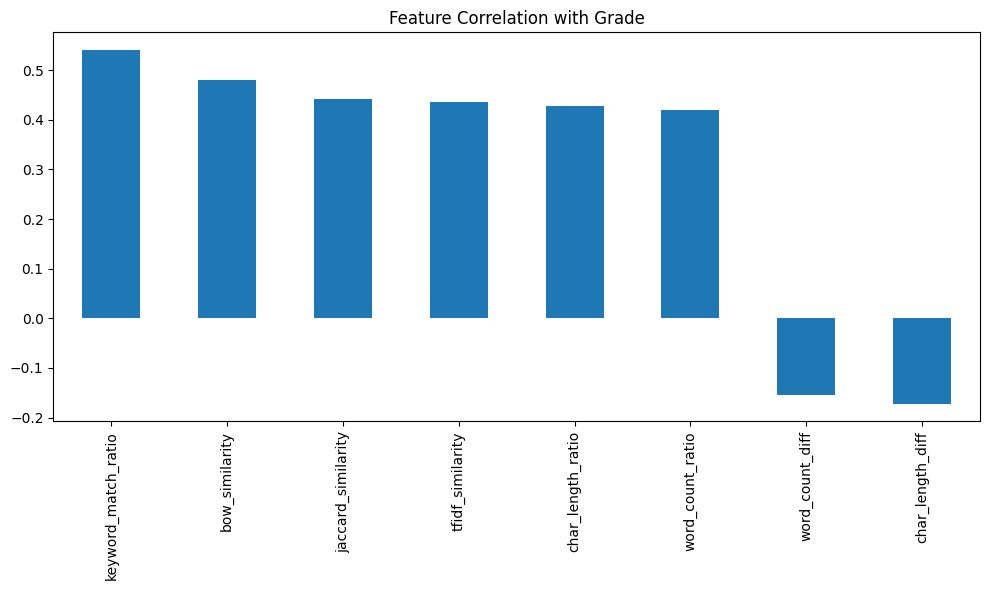

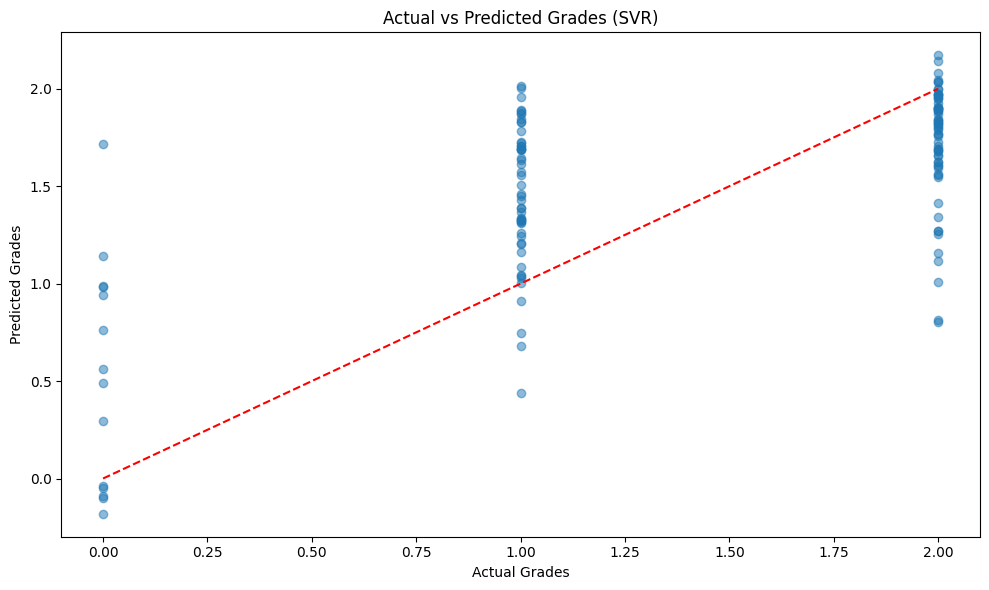

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download necessary NLTK packages
try:
    nltk.data.find('corpora/stopwords')
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('wordnet')

def preprocess_text(text):
    """Advanced text preprocessing function"""
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Define a function to extract text features
def extract_text_features(ref_answers, stud_answers):
    """Extract multiple features from text answers"""
    
    # Text preprocessing
    ref_processed = [preprocess_text(str(text)) for text in ref_answers]
    stud_processed = [preprocess_text(str(text)) for text in stud_answers]
    
    # TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=614)
    ref_tfidf = tfidf_vectorizer.fit_transform(ref_processed)
    stud_tfidf = tfidf_vectorizer.transform(stud_processed)
    
    # Basic Bag of Words
    count_vectorizer = CountVectorizer(min_df=1, max_df=614)
    ref_bow = count_vectorizer.fit_transform(ref_processed)
    stud_bow = count_vectorizer.transform(stud_processed)
    
    # Cosine similarity using TF-IDF
    tfidf_sim = cosine_similarity(ref_tfidf, stud_tfidf).diagonal().reshape(-1, 1)
    
    # Cosine similarity using BoW
    bow_sim = cosine_similarity(ref_bow, stud_bow).diagonal().reshape(-1, 1)
    
    # Text length features
    ref_char_lengths = np.array([len(str(text)) for text in ref_answers]).reshape(-1, 1)
    stud_char_lengths = np.array([len(str(text)) for text in stud_answers]).reshape(-1, 1)
    char_length_ratio = np.array([min(len(str(s)), len(str(r))) / max(len(str(s)), len(str(r))) if max(len(str(s)), len(str(r))) > 0 else 0 
                                 for s, r in zip(stud_answers, ref_answers)]).reshape(-1, 1)
    char_length_diff = np.abs(ref_char_lengths - stud_char_lengths)
    
    # Word count features
    ref_word_counts = np.array([len(str(text).split()) for text in ref_answers]).reshape(-1, 1)
    stud_word_counts = np.array([len(str(text).split()) for text in stud_answers]).reshape(-1, 1)
    word_count_ratio = np.array([min(len(str(s).split()), len(str(r).split())) / max(len(str(s).split()), len(str(r).split())) 
                                if max(len(str(s).split()), len(str(r).split())) > 0 else 0
                                for s, r in zip(stud_answers, ref_answers)]).reshape(-1, 1)
    word_count_diff = np.abs(ref_word_counts - stud_word_counts)
    
    # Unique words overlap
    def unique_word_overlap(text1, text2):
        set1 = set(preprocess_text(str(text1)).split())
        set2 = set(preprocess_text(str(text2)).split())
        if not set1 or not set2:
            return 0
        overlap = len(set1.intersection(set2))
        union = len(set1.union(set2))
        return overlap / union if union > 0 else 0
    
    jaccard_sim = np.array([unique_word_overlap(s, r) for s, r in zip(stud_answers, ref_answers)]).reshape(-1, 1)
    
    # Keyword matching
    def keyword_match_ratio(text1, text2):
        # Count how many words in text1 appear in text2
        words1 = Counter(preprocess_text(str(text1)).split())
        words2 = set(preprocess_text(str(text2)).split())
        if not words1:
            return 0
        matches = sum(1 for word in words1 if word in words2)
        return matches / len(words1) if len(words1) > 0 else 0
    
    keyword_match = np.array([keyword_match_ratio(r, s) for r, s in zip(ref_answers, stud_answers)]).reshape(-1, 1)
    
    # Combine all features
    features = np.hstack([
        tfidf_sim,
        bow_sim,
        char_length_ratio,
        char_length_diff,
        word_count_ratio,
        word_count_diff,
        jaccard_sim,
        keyword_match
    ])
    
    # Create feature names for analysis
    feature_names = [
        'tfidf_similarity',
        'bow_similarity',
        'char_length_ratio',
        'char_length_diff',
        'word_count_ratio', 
        'word_count_diff',
        'jaccard_similarity',
        'keyword_match_ratio'
    ]
    
    return features, feature_names

def create_and_evaluate_models(X, y, feature_names):
    """Create, train and evaluate multiple models"""
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create multiple models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'ElasticNet': ElasticNet(),
        'SVR': SVR(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42)
    }
    
    # Dictionary to store results
    results = {}
    
    # Train and evaluate each model
    for name, model in models.items():
        # Train model
        model.fit(X_train_scaled, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test_scaled)
        
        # Evaluate
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        accuracy = (1 - (mae / np.mean(y_test))) * 100 if np.mean(y_test) > 0 else 0
        
        # Store results
        results[name] = {
            'model': model,
            'mae': mae,
            'rmse': rmse,
            'r2': r2,
            'accuracy': accuracy,
            'predictions': y_pred
        }
        
        print(f"{name}:")
        print(f"  MSE: {mse:.3f}")
        print(f"  MAE: {mae:.3f}")
        print(f"  RMSE: {rmse:.3f}")
        print(f"  R²: {r2:.3f}")
        print(f"  Accuracy: {accuracy:.2f}%")
        print()
    
    # Find the best model based on MAE
    best_model_name = min(results, key=lambda x: results[x]['mae'])
    print(f"Best Model: {best_model_name} with MAE: {results[best_model_name]['mae']:.3f}")
    
    # Feature importance for tree-based models
    if 'Random Forest' in results:
        rf_model = results['Random Forest']['model']
        importances = rf_model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        print("\nFeature Importance (Random Forest):")
        for i, idx in enumerate(indices):
            if i < len(feature_names):
                print(f"{feature_names[idx]}: {importances[idx]:.4f}")
    
    # Create ensemble model
    estimators = [(name, model['model']) for name, model in results.items() 
                 if name in ['Ridge Regression', 'Random Forest', 'Gradient Boosting']]
    
    ensemble = VotingRegressor(estimators)
    ensemble.fit(X_train_scaled, y_train)
    ensemble_pred = ensemble.predict(X_test_scaled)
    
    # Evaluate ensemble
    ensemble_mse = mean_squared_error(y_test, ensemble_pred)
    ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
    ensemble_r2 = r2_score(y_test, ensemble_pred)
    ensemble_accuracy = (1 - (ensemble_mae / np.mean(y_test))) * 100 if np.mean(y_test) > 0 else 0
    
    print("\nEnsemble Model:")
    print(f"  MSE: {ensemble_mse:.3f}")
    print(f"  MAE: {ensemble_mae:.3f}")
    print(f"  R²: {ensemble_r2:.3f}")
    print(f"  Accuracy: {ensemble_accuracy:.2f}%")
    
    # Visualize predictions vs actual for the best model
    plt.figure(figsize=(10, 6))
    best_preds = results[best_model_name]['predictions']
    plt.scatter(y_test, best_preds, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel('Actual Grades')
    plt.ylabel('Predicted Grades')
    plt.title(f'Actual vs Predicted Grades ({best_model_name})')
    plt.tight_layout()
    plt.savefig('prediction_vs_actual.png')
    
    # Error analysis
    errors = np.abs(y_test - best_preds)
    error_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': best_preds,
        'Error': errors
    })
    
    print("\nWorst Predictions:")
    print(error_df.sort_values('Error', ascending=False).head(5))
    
    return results, ensemble, scaler, X_test, y_test

def main(df):
    """Main function that ties everything together"""
    
    # Ensure required columns exist
    required_columns = {'ref_answer', 'student_answer', 'grades_round'}
    if not required_columns.issubset(df.columns):
        raise KeyError(f"Missing columns: {required_columns - set(df.columns)}")
    
    # Extract necessary columns
    ref_answers = df['ref_answer'].values
    stud_answers = df['student_answer'].values
    grades = df['grades_round'].astype(float).values
    
    # Create features
    print("Extracting features...")
    X, feature_names = extract_text_features(ref_answers, stud_answers)
    
    # Analyze feature correlations
    feature_df = pd.DataFrame(X, columns=feature_names)
    feature_df['grade'] = grades
    
    # Display correlation with grade
    correlations = feature_df.corr()['grade'].sort_values(ascending=False)
    print("\nFeature Correlations with Grade:")
    print(correlations)
    
    # Visualize top correlations
    plt.figure(figsize=(10, 6))
    correlations.drop('grade').sort_values(ascending=False).plot(kind='bar')
    plt.title('Feature Correlation with Grade')
    plt.tight_layout()
    plt.savefig('feature_correlations.png')
    
    # Train and evaluate models
    print("\nTraining and evaluating models...")
    results, ensemble, scaler, X_test, y_test = create_and_evaluate_models(X, grades, feature_names)
    
    # Perform hyperparameter tuning for the top model (using Random Forest as an example)
    print("\nPerforming hyperparameter tuning...")
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                              cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
    grid_search.fit(X, grades)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best MAE: {-grid_search.best_score_:.3f}")
    
    # Create the best model
    best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
    best_rf.fit(X, grades)
    
    # Cross-validation
    print("\nPerforming cross-validation...")
    cv_scores = cross_val_score(best_rf, X, grades, cv=5, scoring='neg_mean_absolute_error')
    print(f"Cross-validation MAE: {-np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")
    
    # Define a function for grading new answers
    def grade_new_answer(ref_answer, student_answer, model=best_rf, feat_scaler=scaler):
        """Grade a new student answer based on a reference answer"""
        # Extract features
        features, _ = extract_text_features([ref_answer], [student_answer])
        
        # Scale features
        scaled_features = feat_scaler.transform(features)
        
        # Predict grade
        predicted_grade = model.predict(scaled_features)[0]
        
        # Ensure grade is within valid range (assuming 0-100)
        predicted_grade = max(0, min(100, predicted_grade))
        
        return predicted_grade
    
    # Example usage
    if len(ref_answers) > 0 and len(stud_answers) > 0:
        example_ref = ref_answers[0]
        example_stud = stud_answers[0]
        predicted_grade = grade_new_answer(example_ref, example_stud)
        print(f"\nExample Grading:")
        print(f"Reference Answer: {example_ref[:100]}...")
        print(f"Student Answer: {example_stud[:100]}...")
        print(f"Actual Grade: {grades[0]}")
        print(f"Predicted Grade: {predicted_grade:.2f}")
    
    # Return the best model and preprocessing tools
    return {
        'best_rf_model': best_rf,
        'ensemble_model': ensemble,
        'scaler': scaler,
        'feature_extractor': extract_text_features,
        'grade_function': grade_new_answer
    }

# Example usage
if __name__ == "__main__":
    # Assuming df is already loaded
    df = pd.read_csv('asag_dataset.csv')
    results = main(df)

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


# Ensure required columns exist
required_columns = {'ref_answer', 'student_answer', 'grades_round'}
if not required_columns.issubset(df.columns):
    raise KeyError(f"Missing columns: {required_columns - set(df.columns)}")

# Extract necessary columns
ref_answers = df['ref_answer'].astype(str).values  # Convert to string to avoid errors
stud_answers = df['student_answer'].astype(str).values
grades = df['grades_round'].astype(float).values  # Convert grades to float

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform reference answers
ref_tfidf = vectorizer.fit_transform(ref_answers)

# Transform student answers
stud_tfidf = vectorizer.transform(stud_answers)

# Compute cosine similarity for each answer pair
cos_sim = cosine_similarity(ref_tfidf, stud_tfidf).diagonal().reshape(-1, 1)

# ADD FEATURE ENGINEERING HERE
# Length difference between reference and student answers
length_diff = np.array([abs(len(ref) - len(stud)) for ref, stud in zip(ref_answers, stud_answers)]).reshape(-1, 1)

# Word count difference
ref_word_counts = np.array([len(ref.split()) for ref in ref_answers]).reshape(-1, 1)
stud_word_counts = np.array([len(stud.split()) for stud in stud_answers]).reshape(-1, 1)
word_count_diff = np.abs(ref_word_counts - stud_word_counts)

# Combine features
X = np.hstack([cos_sim, length_diff, word_count_diff])

# Split dataset into training and testing sets (use X instead of cos_sim)
X_train, X_test, y_train, y_test = train_test_split(X, grades, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = (1 - (mae / np.mean(y_test))) * 100

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")
print(f"Accuracy: {accuracy:.2f}%")

Mean Absolute Error (MAE): 0.528
R² Score: 0.220
Accuracy: 61.87%


#### LSTM


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/asag_dataset.csv")  # Update filename if necessary

# Ensure required columns exist
required_columns = {'ref_answer', 'student_answer', 'grades_round'}
if not required_columns.issubset(df.columns):
    raise KeyError(f"Missing columns: {required_columns - set(df.columns)}")

# Extract necessary columns
ref_answers = df['ref_answer'].astype(str).values  # Convert to string to avoid errors
stud_answers = df['student_answer'].astype(str).values
grades = df['grades_round'].astype(float).values  # Convert grades to float

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(np.concatenate((ref_answers, stud_answers), axis=0))

# Convert text to sequences
ref_sequences = tokenizer.texts_to_sequences(ref_answers)
stud_sequences = tokenizer.texts_to_sequences(stud_answers)

# Padding sequences
max_length = max(max(len(seq) for seq in ref_sequences), max(len(seq) for seq in stud_sequences))
ref_padded = pad_sequences(ref_sequences, maxlen=max_length, padding='post')
stud_padded = pad_sequences(stud_sequences, maxlen=max_length, padding='post')

# Compute absolute difference between encoded sequences
diff_padded = np.abs(ref_padded - stud_padded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(diff_padded, grades, test_size=0.2, random_state=42)

# Define LSTM Model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=True),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Regression output
])

# Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train Model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = (1 - (mae / np.mean(y_test))) * 100  # Compute accuracy as a percentage

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")
print(f"Accuracy: {accuracy:.2f}%")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - loss: 1.2643 - mae: 0.9356 - val_loss: 0.5142 - val_mae: 0.6433
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - loss: 0.5806 - mae: 0.6713 - val_loss: 0.4575 - val_mae: 0.6120
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.5173 - mae: 0.6421 - val_loss: 0.4317 - val_mae: 0.5891
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.4401 - mae: 0.5863 - val_loss: 0.4038 - val_mae: 0.5667
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.3583 - mae: 0.5179 - val_loss: 0.5071 - val_mae: 0.5574
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.3000 - mae: 0.4279 - val_loss: 0.4104 - val_mae: 0.5351
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.2215 - mae: 0.4008 - val_loss: 0.3523 - val_mae: 0.5025
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.2160 - mae: 0.3712 - val_loss: 0.3479 - val_mae: 0.4868
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - loss: 0.1802 - m

#### improved lstm......word embedding like glove


In [10]:
# wget "http://nlp.stanford.edu/data/glove.6B.zip"
# unzip glove.6B.zip

import requests, zipfile, io

# Download the zip file
url = "http://nlp.stanford.edu/data/glove.6B.zip"
response = requests.get(url)

# Unzip it
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extractall("glove.6B")  # folder to extract to

print("Download and extraction complete!")


Download and extraction complete!


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GlobalAveragePooling1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/asag_dataset.csv")  # Update filename if necessary

# Ensure required columns exist
required_columns = {'ref_answer', 'student_answer', 'grades_round'}
if not required_columns.issubset(df.columns):
    raise KeyError(f"Missing columns: {required_columns - set(df.columns)}")

# Extract necessary columns
ref_answers = df['ref_answer'].astype(str).values  # Convert to string to avoid errors
stud_answers = df['student_answer'].astype(str).values
grades = df['grades_round'].astype(float).values  # Convert grades to float

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(np.concatenate((ref_answers, stud_answers), axis=0))

# Convert text to sequences
ref_sequences = tokenizer.texts_to_sequences(ref_answers)
stud_sequences = tokenizer.texts_to_sequences(stud_answers)

# Padding sequences
max_length = max(max(len(seq) for seq in ref_sequences), max(len(seq) for seq in stud_sequences))
ref_padded = pad_sequences(ref_sequences, maxlen=max_length, padding='post')
stud_padded = pad_sequences(stud_sequences, maxlen=max_length, padding='post')

# Compute absolute difference between encoded sequences
diff_padded = np.abs(ref_padded - stud_padded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(diff_padded, grades, test_size=0.2, random_state=42)

# Load GloVe word embeddings
def load_glove_embeddings(filepath, tokenizer, embedding_dim):
    embeddings_index = {}
    with open(filepath, encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    vocab_size = len(tokenizer.word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for word, i in tokenizer.word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return embedding_matrix

embedding_dim = 100  # Use GloVe 100D
embedding_matrix = load_glove_embeddings("glove.6B.100d.txt", tokenizer, embedding_dim)

# Define Improved LSTM Model
vocab_size = len(tokenizer.word_index) + 1
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False),
    Bidirectional(LSTM(128, return_sequences=True)),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')  # Regression output
])

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train Model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = (1 - (mae / np.mean(y_test))) * 100  # Compute accuracy as a percentage

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")
print(f"Accuracy: {accuracy:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 780ms/step - loss: 1.0668 - mae: 0.8551 - val_loss: 0.5060 - val_mae: 0.5918
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 832ms/step - loss: 0.5681 - mae: 0.6020 - val_loss: 0.4937 - val_mae: 0.5815
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 786ms/step - loss: 0.4979 - mae: 0.5790 - val_loss: 0.4075 - val_mae: 0.5377
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 532ms/step - loss: 0.5269 - mae: 0.6086 - val_loss: 0.3998 - val_mae: 0.5314
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 788ms/step - loss: 0.4920 - mae: 0.5909 - val_loss: 0.3841 - val_mae: 0.5212
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 756ms/step - loss: 0.4686 - mae: 0.5863 - val_loss: 0.3792 - val_mae: 0.5130
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 777ms/step - loss: 0.4007 - mae: 0.5347 - val_loss: 0.3288 - val_mae: 0.4744
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 808ms/step - loss: 0.3782 - mae: 0.5122 - val_loss: 0.3164 - val_mae: 0.4638
Epoch 9/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 748ms/

#### Pretrained BERT-Based ASAG

In [ ]:
from huggingface_hub import login

login()


In [ ]:
!huggingface-cli whoami


SimplyNeha


In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/asag_dataset.csv")  # Ensure correct filename

# Ensure required columns exist
required_columns = {'ref_answer', 'student_answer', 'grades_round'}
if not required_columns.issubset(df.columns):
    raise KeyError(f"Missing columns: {required_columns - set(df.columns)}")

# Extract necessary columns
ref_answers = df['ref_answer'].astype(str).tolist()
stud_answers = df['student_answer'].astype(str).tolist()
grades = df['grades_round'].astype(float).values  # Convert grades to float

# Load Pretrained BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Function to extract BERT embeddings
def get_bert_embeddings(text_list):
    embeddings = []
    for text in text_list:
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()  # Use [CLS] token embedding
        embeddings.append(cls_embedding)
    return np.array(embeddings)

# Extract BERT embeddings
ref_embeddings = get_bert_embeddings(ref_answers)
stud_embeddings = get_bert_embeddings(stud_answers)

# Compute absolute difference between embeddings (distance measure)
X = np.abs(ref_embeddings - stud_embeddings)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, grades, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = (1 - (mae / np.mean(y_test))) * 100  # Compute accuracy

# Display Results
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")
print(f"Accuracy: {accuracy:.2f}%")


Mean Absolute Error (MAE): 0.696
R² Score: -0.756
Accuracy: 49.70%


#### Fine-Tune BERT for ASAG

In [ ]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/asag_dataset.csv")

# Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenization function
def tokenize_data(ref_texts, stud_texts, tokenizer, max_len=256):
    return tokenizer(
        list(ref_texts), list(stud_texts),
        padding='max_length', truncation="only_second",
        max_length=max_len, return_tensors="pt"
    )

# Tokenize both reference and student answers
tokenized_data = tokenize_data(df['ref_answer'].astype(str), df['student_answer'].astype(str), tokenizer)

input_ids = tokenized_data['input_ids']
attention_mask = tokenized_data['attention_mask']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define Fine-tuned BERT Model
class BertRegressionModel(nn.Module):
    def __init__(self):
        super(BertRegressionModel, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.regressor = nn.Linear(self.bert.config.hidden_size, 1)  # Regression output

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        return self.regressor(pooled_output)

# Initialize Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertRegressionModel().to(device)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

# Training Loop
def train_model(model, train_loader, criterion, optimizer, epochs=15):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in train_loader:
            input_ids, labels = batch
            input_ids = input_ids.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            predictions = model(input_ids=input_ids, attention_mask=(input_ids > 0).long()).squeeze()
            loss = criterion(predictions, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")

train_model(model, train_loader, criterion, optimizer, epochs=15)

Epoch 1, Loss: 0.5464955893429843
Epoch 2, Loss: 0.30822799806341983
Epoch 3, Loss: 0.24821928775671756
Epoch 4, Loss: 0.20133014486143083
Epoch 5, Loss: 0.15017854715838577
Epoch 6, Loss: 0.1053885475478389
Epoch 7, Loss: 0.06486132295068467
Epoch 8, Loss: 0.041677157930804024
Epoch 9, Loss: 0.03009343816136772
Epoch 10, Loss: 0.027963122578732895
Epoch 11, Loss: 0.027171308400504517
Epoch 12, Loss: 0.024267390539700336
Epoch 13, Loss: 0.014683837889496124
Epoch 14, Loss: 0.012527317697690292
Epoch 15, Loss: 0.011810952599978808


In [ ]:
# Evaluate Model
def evaluate(model, test_loader):
    model.eval()
    predictions, actuals = [], []

    with torch.no_grad():
        for batch in test_loader:
            input_ids, labels = batch
            input_ids = input_ids.to(device)
            labels = labels.to(device)

            preds = model(input_ids=input_ids, attention_mask=(input_ids > 0).long()).squeeze()
            predictions.extend(preds.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    return predictions, actuals

y_pred, y_true = evaluate(model, test_loader)

# Compute MAE and R² Score
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
accuracy = (1 - (mae / np.mean(y_true))) * 100  # Accuracy formula

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")
print(f"Accuracy: {accuracy:.2f}%")


Mean Absolute Error (MAE): 0.351
R² Score: 0.395
Accuracy: 74.66%


#### Improved BERT

In [6]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("asag_dataset.csv")

# Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenization function
def tokenize_data(ref_texts, stud_texts, tokenizer, max_len=256):
    return tokenizer(
        list(ref_texts),
        list(stud_texts),
        padding='max_length',
        truncation="only_second",
        max_length=max_len,
        return_tensors="pt"
    )

# Tokenize answers
tokenized = tokenize_data(df['ref_answer'].astype(str), df['student_answer'].astype(str), tokenizer)
input_ids = tokenized['input_ids']
attention_mask = tokenized['attention_mask']

# Labels
y = torch.tensor(df['grades_round'].values, dtype=torch.float32)
# Optional: normalize grades to [0,1] if you're doing regression on a 0–2 scale
# y = (y - y.min()) / (y.max() - y.min())

# Train-test split
X_train_ids, X_test_ids, y_train, y_test, mask_train, mask_test = train_test_split(
    input_ids, y, attention_mask, test_size=0.2, random_state=42
)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_ids, mask_train, y_train)
test_dataset = TensorDataset(X_test_ids, mask_test, y_test)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Regression Model with BERT
class BertRegressionModel(nn.Module):
    def __init__(self):
        super(BertRegressionModel, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.regressor = nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output  # [CLS] token representation
        return self.regressor(pooled_output)

# Initialize model and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertRegressionModel().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Training loop
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for input_ids, attention_mask, labels in train_loader:
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            predictions = model(input_ids, attention_mask).squeeze()
            loss = criterion(predictions, labels)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # prevent exploding gradients
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{epochs} | Loss: {avg_loss:.4f}")

# Evaluation
def evaluate_model(model, test_loader):
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for input_ids, attention_mask, labels in test_loader:
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)

            preds = model(input_ids, attention_mask).squeeze()
            predictions.extend(preds.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    return predictions, actuals

# Train
train_model(model, train_loader, criterion, optimizer, epochs=10)

# Evaluate
y_pred, y_true = evaluate_model(model, test_loader)

# Metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
# accuracy = (1 - (mae / np.mean(y_true))) * 100  # approximate regression accuracy

print("\n📊 Final Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")
# print(f"Approximate Accuracy: {accuracy:.2f}%")


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


Epoch 1/10 | Loss: 0.7042
Epoch 2/10 | Loss: 0.3352
Epoch 3/10 | Loss: 0.2659
Epoch 4/10 | Loss: 0.2306
Epoch 5/10 | Loss: 0.1625
Epoch 6/10 | Loss: 0.1070
Epoch 7/10 | Loss: 0.0872
Epoch 8/10 | Loss: 0.0578
Epoch 9/10 | Loss: 0.1070
Epoch 10/10 | Loss: 0.0517

📊 Final Evaluation Metrics:
Mean Squared Error (MSE): 0.250
Mean Absolute Error (MAE): 0.355
R² Score: 0.447
